In [10]:
import pandas as pd


psdata=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/psych_signal_data/Psych_Signal_History_2019.csv")
marketdata=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/Market_data/OHLC_1Y_APR-2019 copy.csv")

new_df = pd.merge(psdata, marketdata, on=['date','symbol'])
#new_df=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/combine.csv")
#corrdf=newdf[']

In [20]:
len(new_df)

870857

In [21]:
new_df.tail()

,SOURCE,SYMBOL,TIMESTAMP_UTC,BULLISH_INTENSITY,BEARISH_INTENSITY,BULL_MINUS_BEAR,BULL_SCORED_MESSAGES,BEAR_SCORED_MESSAGES,BULL_BEAR_MSG_RATIO,TOTAL_SCANNED_MESSAGES,date,garbage,open,high,low,close,volume
870852,stocktwits+twitter_enhanced_withretweets,ZYNE,2019-04-22T04:00:00Z,1.684769,1.867000,-0.182231,65,20,3.2500,220,2019-04-22,04:00:00Z,8.17,9.64,8.05,9.50,"4,184,187"
870853,stocktwits+twitter_enhanced_withretweets,ZYNE,2019-04-23T04:00:00Z,1.602326,1.485000,0.117326,43,10,4.3000,152,2019-04-23,04:00:00Z,9.36,10.00,9.08,9.90,"2,888,980"
870854,stocktwits+twitter_enhanced_withretweets,ZYNE,2019-04-24T04:00:00Z,1.887083,1.235714,0.651369,24,7,3.4286,94,2019-04-24,04:00:00Z,9.76,10.21,9.68,10.01,"2,198,566"
870855,stocktwits+twitter_enhanced_withretweets,ZYNE,2019-04-25T04:00:00Z,1.617692,1.950000,-0.332308,13,6,2.1667,74,2019-04-25,04:00:00Z,9.86,10.37,9.70,10.33,"1,553,160"
870856,stocktwits+twitter_enhanced_withretweets,ZYNE,2019-04-26T04:00:00Z,1.739130,1.154231,0.584900,46,26,1.7692,214,2019-04-26,04:00:00Z,10.33,11.81,10.02,10.99,"4,005,385"


In [6]:
marketdata.tail()

,symbol,date,open,high,low,close,volume
897038,ZYNE,4/23/19,9.36,10.00,9.08,9.90,"2,888,980"
897039,ZYNE,4/24/19,9.76,10.21,9.68,10.01,"2,198,566"
897040,ZYNE,4/25/19,9.86,10.37,9.70,10.33,"1,553,160"
897041,ZYNE,4/26/19,10.33,11.81,10.02,10.99,"4,005,385"
897042,ZYNE,4/29/19,11.08,12.07,11.05,11.56,"3,172,048"


In [17]:
psdata.tail()

,SOURCE,SYMBOL,TIMESTAMP_UTC,BULLISH_INTENSITY,BEARISH_INTENSITY,BULL_MINUS_BEAR,BULL_SCORED_MESSAGES,BEAR_SCORED_MESSAGES,BULL_BEAR_MSG_RATIO,TOTAL_SCANNED_MESSAGES,date,garbage
3162281,stocktwits+twitter_enhanced_withretweets,ZZZ.CA,2019-03-28T04:00:00Z,0.0,0.0,0.0,0,0,0.0,1,2019-03-28,04:00:00Z
3162282,stocktwits+twitter_enhanced_withretweets,ZZZ.CA,2019-03-31T04:00:00Z,0.0,0.0,0.0,0,0,0.0,1,2019-03-31,04:00:00Z
3162283,stocktwits+twitter_enhanced_withretweets,ZZZ.CA,2019-04-02T04:00:00Z,0.0,0.0,0.0,0,0,0.0,1,2019-04-02,04:00:00Z
3162284,stocktwits+twitter_enhanced_withretweets,ZZZ.CA,2019-04-06T04:00:00Z,0.0,0.0,0.0,0,0,0.0,1,2019-04-06,04:00:00Z
3162285,stocktwits+twitter_enhanced_withretweets,ZZZ.CA,2019-04-26T04:00:00Z,0.0,0.0,0.0,0,0,0.0,1,2019-04-26,04:00:00Z


In [14]:
psdata=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/psych_signal_data/Psych_Signal_History_2019.csv")

In [16]:
psdata[['date','garbage']] = psdata.TIMESTAMP_UTC.str.split("T",expand=True)

In [19]:
marketdata=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/Market_data/OHLC_1Y_APR-2019 copy.csv")

new_df = pd.merge(psdata, marketdata, on=['date','SYMBOL'])

In [22]:
new_df.to_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/finalcombined6.csv")

In [25]:
symbolarray=new_df['SYMBOL'].unique()
bigdata = pd.DataFrame()
for tempsymbol in symbolarray:
    p=new_df[new_df['SYMBOL']==tempsymbol]
    plose1=p['close'].diff(-1)
    plose2=p['close'].diff(-2)
    plose3=p['close'].diff(-3)
    plose4=p['close'].diff(-4)
    plose5=p['close'].diff(-5)
    p['Day1']=plose1
    p['Day2']=plose2
    p['Day3']=plose3
    p['Day4']=plose4
    p['Day5']=plose5
    p=p.dropna()
    bigdata = bigdata.append(p, ignore_index=True)
bigdata['Day1']=bigdata['Day1']*-100/bigdata['close']
bigdata['Day2']=bigdata['Day2']*-100/bigdata['close']
bigdata['Day3']=bigdata['Day3']*-100/bigdata['close']
bigdata['Day4']=bigdata['Day4']*-100/bigdata['close']
bigdata['Day5']=bigdata['Day5']*-100/bigdata['close']    
bigdata.to_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/FC5days.csv")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [26]:
bigdata=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/FC5days.csv")

In [27]:
bigdata.head(10)

,SYMBOL,BULLISH_INTENSITY,BEARISH_INTENSITY,BULL_MINUS_BEAR,BULL_SCORED_MESSAGES,BEAR_SCORED_MESSAGES,BULL_BEAR_MSG_RATIO,TOTAL_SCANNED_MESSAGES,date,open,high,low,close,volume,Day1,Day2,Day3,Day4,Day5
0,AA,1.405556,1.572500,-0.166944,9,4,2.2500,47,4/30/18,51.40,51.86,51.05,51.20,"2,749,820",1.542969,3.652344,4.062500,6.230469,6.542969
1,AA,1.690000,1.352000,0.338000,7,5,1.4000,35,5/1/18,51.04,52.43,50.11,51.99,"2,526,305",2.077323,2.481246,4.616272,4.924024,3.404501
2,AA,2.215000,1.348571,0.866429,6,7,0.8571,49,5/2/18,52.45,53.50,52.21,53.07,"3,375,521",0.395704,2.487281,2.788770,1.300170,0.791408
3,AA,1.285000,1.602500,-0.317500,10,4,2.5000,32,5/3/18,52.83,53.76,52.63,53.28,"4,050,792",2.083333,2.383634,0.900901,0.394144,0.957207
4,AA,2.037143,3.000000,-0.962857,7,2,3.5000,176,5/4/18,53.04,54.46,52.65,54.39,"2,598,700",0.294172,-1.158301,-1.654716,-1.103144,-0.790587
5,AA,2.265000,0.000000,2.265000,10,0,0.0000,43,5/7/18,54.80,55.38,54.32,54.55,"3,891,589",-1.448213,-1.943171,-1.393217,-1.081577,-4.069661
6,AA,2.322500,1.995000,0.327500,12,4,3.0000,42,5/8/18,54.26,54.65,53.44,53.76,"2,756,129",-0.502232,0.055804,0.372024,-2.659970,-5.989583
7,AA,0.775000,1.392500,-0.617500,2,4,0.5000,18,5/9/18,53.72,54.13,53.18,53.49,"3,647,512",0.560852,0.878669,-2.168630,-5.515050,-6.169377
8,AA,1.394000,1.306000,0.088000,5,5,1.0000,50,5/10/18,53.40,54.01,53.09,53.79,"3,321,925",0.316044,-2.714259,-6.042015,-6.692694,-5.725971
9,AA,2.025000,2.075000,-0.050000,2,4,0.5000,48,5/11/18,53.79,54.25,53.37,53.96,"3,978,772",-3.020756,-6.338028,-6.986657,-6.022980,-5.800593


In [40]:
templist=[]
percentageday='Day5'
for j in bigdata['SYMBOL'].unique():
    p=bigdata[bigdata['SYMBOL']==j]
    new_df=p[[percentageday,'BULLISH_INTENSITY','BEARISH_INTENSITY','BULL_MINUS_BEAR','BULL_SCORED_MESSAGES','BEAR_SCORED_MESSAGES','BULL_BEAR_MSG_RATIO','TOTAL_SCANNED_MESSAGES']]
    temp=new_df.corr(method ='pearson')[percentageday]['BULLISH_INTENSITY']
    temp1=new_df.corr(method ='pearson')[percentageday]['BEARISH_INTENSITY']
    temp2=new_df.corr(method ='pearson')[percentageday]['BULL_MINUS_BEAR']
    temp3=new_df.corr(method ='pearson')[percentageday]['BULL_SCORED_MESSAGES']
    temp4=new_df.corr(method ='pearson')[percentageday]['BEAR_SCORED_MESSAGES']
    temp5=new_df.corr(method ='pearson')[percentageday]['BULL_BEAR_MSG_RATIO']
    temp6=new_df.corr(method ='pearson')[percentageday]['TOTAL_SCANNED_MESSAGES']
    templist.append([j,temp,temp1,temp2,temp3,temp4,temp5,temp6])
df = pd.DataFrame(templist,columns = ['SYMBOL' , 'BULLISH_INTENSITY_CORR','BEARISH_INTENSITY_CORR','BULL_MINUS_BEAR_CORR','BULL_SCORED_MESSAGES_CORR','BEAR_SCORED_MESSAGES_CORR','BULL_BEAR_MSG_RATIO_CORR','TOTAL_SCANNED_MESSAGES_CORR'])
df.to_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/Finalday5Corr.csv")

In [32]:
data=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/Finalday3Corr.csv")
data.head()

,Unnamed: 0,SYMBOL,BULLISH_INTENSITY_CORR,BEARISH_INTENSITY_CORR,BULL_MINUS_BEAR_CORR,BULL_SCORED_MESSAGES_CORR,BEAR_SCORED_MESSAGES_CORR,BULL_BEAR_MSG_RATIO_CORR,TOTAL_SCANNED_MESSAGES_CORR
0,0,AA,-0.021183,-0.067262,0.045452,-0.017863,-0.022704,0.041450,-0.034185
1,1,AABA,-0.076125,0.075661,-0.105922,0.013080,0.069139,-0.025183,-0.028660
2,2,AAC,-0.013734,-0.006902,-0.001195,0.028993,-0.132401,0.169499,0.036026
3,3,AAL,-0.067670,0.066353,-0.090860,0.032030,0.124326,-0.077023,0.160538
4,4,AAN,0.060047,0.012642,0.029008,0.003845,0.076291,-0.080143,-0.002734


In [42]:
import pandas as pd

# import KMeans
from sklearn.cluster import KMeans
# create kmeans object
data=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/Finalday5Corr.csv")
del data['SYMBOL']
#del data['Sector']
#del data['Industry']
del data['Unnamed: 0']
kmeans = KMeans(n_clusters=8)
# fit kmeans object to data
kmeans.fit(data.values)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(data.values)

data1=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/Finalday5Corr.csv")
data1['cluster']=list(y_km)
data1.to_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/clusters/KmeansDay5Cluster.csv")

[[ 0.03311603 -0.07433743  0.08035602 -0.0221     -0.06907587 -0.00824669
  -0.04047799]
 [-0.07585162 -0.02009851 -0.03329175 -0.10554973 -0.05340851 -0.06588821
  -0.09839192]
 [ 0.01851884  0.07696127 -0.04608026  0.09236085  0.1232183   0.05210047
   0.13562586]
 [-0.02563646 -0.04848042  0.02167005 -0.19174653 -0.18718063 -0.03477164
  -0.20417084]
 [ 0.01246997  0.04242905 -0.02542951  0.00657082 -0.00353817  0.03983881
  -0.00635357]
 [ 0.09149737 -0.00652215  0.06636364  0.09367279  0.02866822  0.06221061
   0.09597568]
 [-0.07338459  0.07230272 -0.10325942 -0.04420286  0.05494095 -0.03004779
   0.00069586]
 [-0.03134185 -0.02946384  0.00471164  0.00074774  0.0424576  -0.04457442
   0.04541388]]


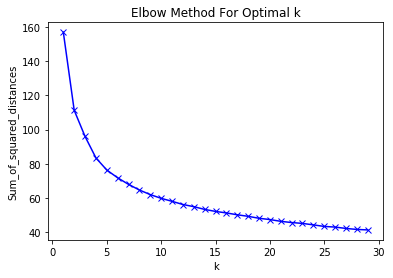

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
data=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/Finalday1Corr.csv")
del data['symbol']
#del data['Sector']
#del data['Industry']
del data['Unnamed: 0']

Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data.values)
    Sum_of_squared_distances.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [44]:
import pandas as pd
data=pd.read_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/FC5days.csv")
#bigdata['symbol'].unique()
k=['AA','AMZN']
templist=[]
percentageday='Day3'
for j in data['SYMBOL'].unique():
    #p=data[data['symbol']==j]
    
    temp=data[data.SYMBOL==j].loc[:,"TOTAL_SCANNED_MESSAGES"].std()
    temp1=data[data.SYMBOL==j].loc[:,"BULL_SCORED_MESSAGES"].std()
    temp2=data[data.SYMBOL==j].loc[:,"BEAR_SCORED_MESSAGES"].std()
    
    templist.append([j,temp,temp1,temp2])
df = pd.DataFrame(templist,columns = ['symbol' , 'STD_TOTAL_SCANNED_MESSAGES','STD_BULL_SCORED_MESSAGES','STD_BEAR_SCORED_MESSAGES'])
df.to_csv("/Users/vaibhavswami/Desktop/Assignment/capstone/data/clusters/STD_Messages.csv")

In [8]:
#https://towardsdatascience.com/how-to-cluster-in-high-dimensions-4ef693bacc6
import hdbscan
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=8, min_samples=None, p=None)

clusterer.fit(data.values)

clusterer.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [9]:
import seaborn as sns
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data.values)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.values.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

TypeError: scatter() got multiple values for argument 's'

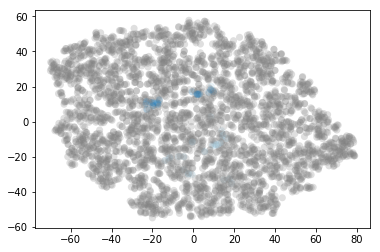

In [10]:
#digits = datasets.load_digits()
#data = digits.data
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
projection = TSNE().fit_transform(data.values)
#plt.scatter(*projection.T, **plot_kwds)
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(data.values)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [11]:
#https://github.com/scikit-learn-contrib/hdbscan/blob/master/docs/comparing_clustering_algorithms.rst
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

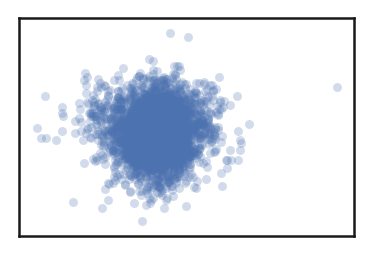

In [15]:
plt.scatter(pca_data[0], pca_data[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [13]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data[0], data[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [14]:
from sklearn.decomposition import PCA 
pca = PCA(2) 
pca.fit(data.values) 
  
pca_data = pd.DataFrame(pca.transform(data.values)) 
  
print(pca_data.head())

          0         1
0 -0.021045  0.087945
1 -0.006934 -0.091487
2  0.027340  0.045770
3  0.113093  0.003140
4 -0.154599 -0.110908


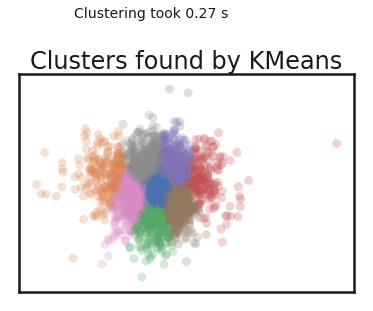

In [16]:
plot_clusters(pca_data, cluster.KMeans, (), {'n_clusters':8})

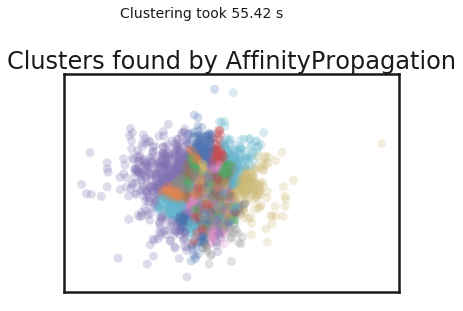

In [17]:
plot_clusters(pca_data, cluster.AffinityPropagation, (), {'preference':-2.0, 'damping':0.70})

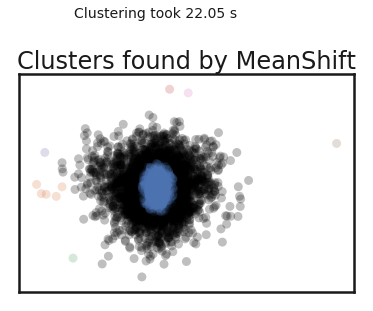

In [18]:
plot_clusters(pca_data, cluster.MeanShift, (0.105,), {'cluster_all':False})

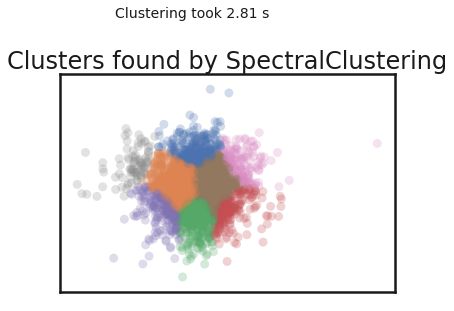

In [19]:
plot_clusters(pca_data, cluster.SpectralClustering, (), {'n_clusters':8})

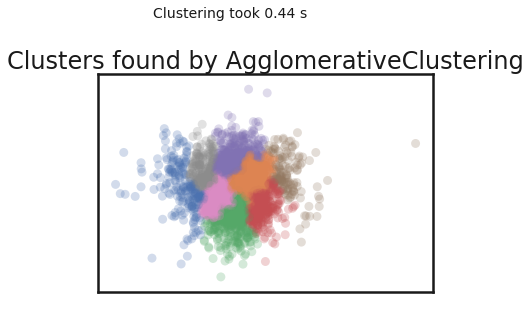

In [20]:
plot_clusters(pca_data, cluster.AgglomerativeClustering, (), {'n_clusters':8, 'linkage':'ward'})

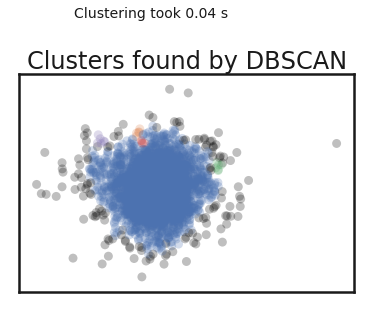

In [21]:
plot_clusters(pca_data, cluster.DBSCAN, (), {'eps':0.025})

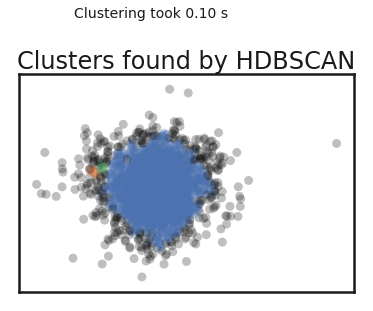

In [22]:
plot_clusters(pca_data, hdbscan.HDBSCAN, (), {'min_cluster_size':8})

          0         1         2
0 -0.021045  0.087945  0.029142
1 -0.006934 -0.091487 -0.045495
2  0.027340  0.045770  0.052405
3  0.113093  0.003140 -0.095134
4 -0.154599 -0.110908 -0.177559


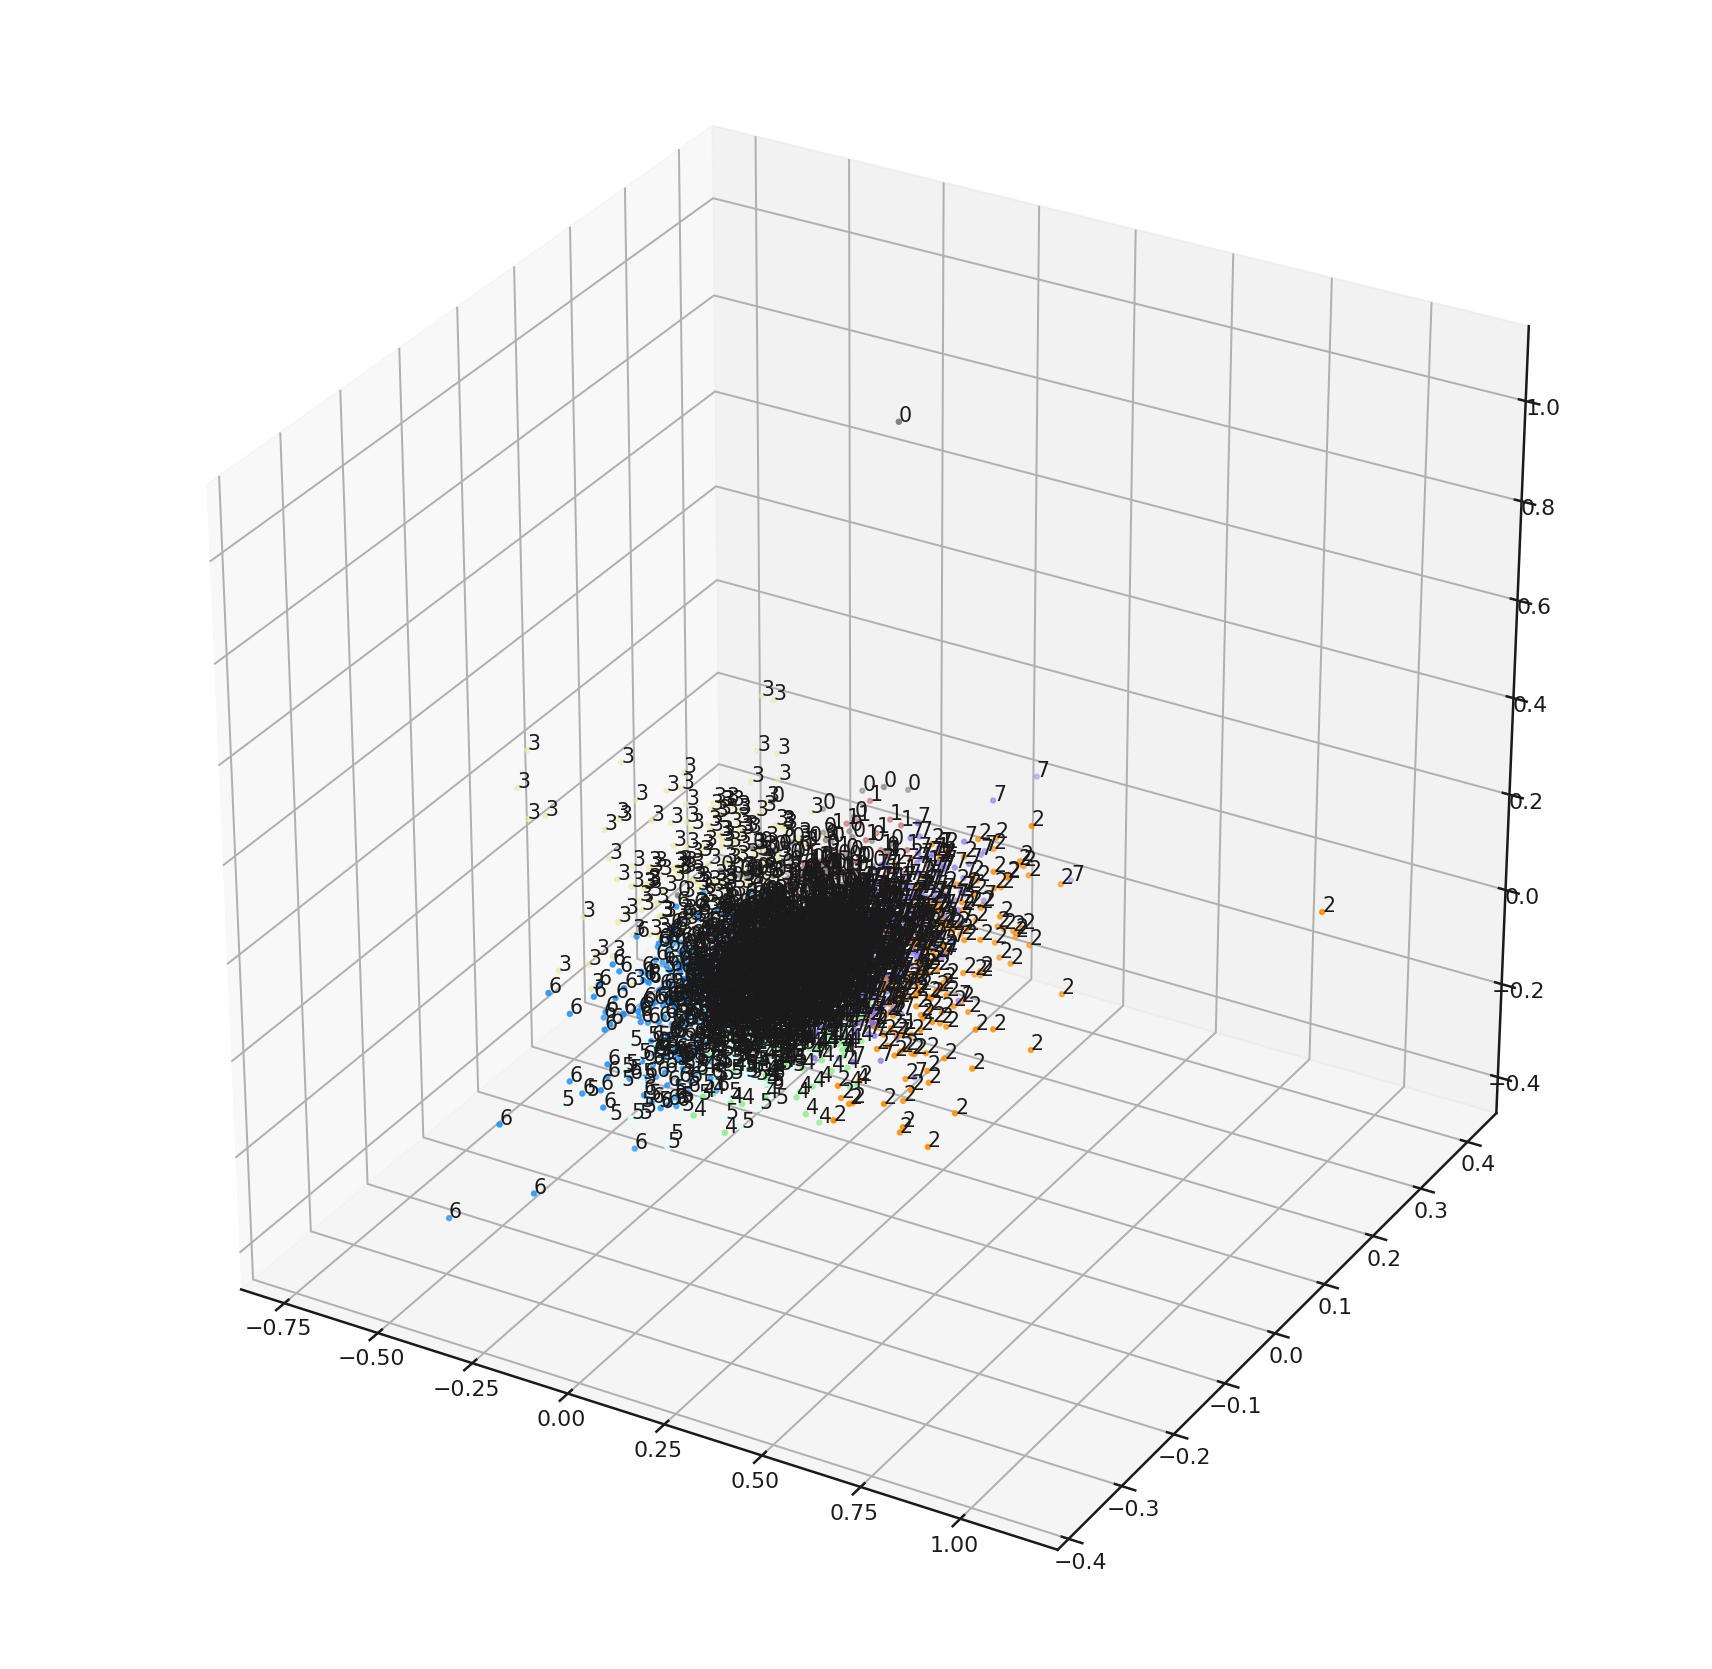

In [23]:
from sklearn.decomposition import PCA 
pca = PCA(3) 
pca.fit(data.values) 
  
pca_data = pd.DataFrame(pca.transform(data.values)) 
  
print(pca_data.head())
from matplotlib import colors as mcolors 
import math 
clusters = 8
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(pca_data) 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips]
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(30,30)) 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 20.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
#plt.figure(figsize=(30,30))    
plt.show() 

 Generating different colors in ascending order  
                                of their hsv values 
For n_clusters = 2 The average silhouette_score is : 0.24363719451416896
For n_clusters = 3 The average silhouette_score is : 0.18935770755834963
For n_clusters = 4 The average silhouette_score is : 0.18665141460960807
For n_clusters = 5 The average silhouette_score is : 0.17554972380493403
For n_clusters = 6 The average silhouette_score is : 0.15646326587305834
For n_clusters = 7 The average silhouette_score is : 0.15590126490853726
For n_clusters = 8 The average silhouette_score is : 0.15118862091638774
For n_clusters = 9 The average silhouette_score is : 0.14709400229572606
For n_clusters = 10 The average silhouette_score is : 0.14108913604899737


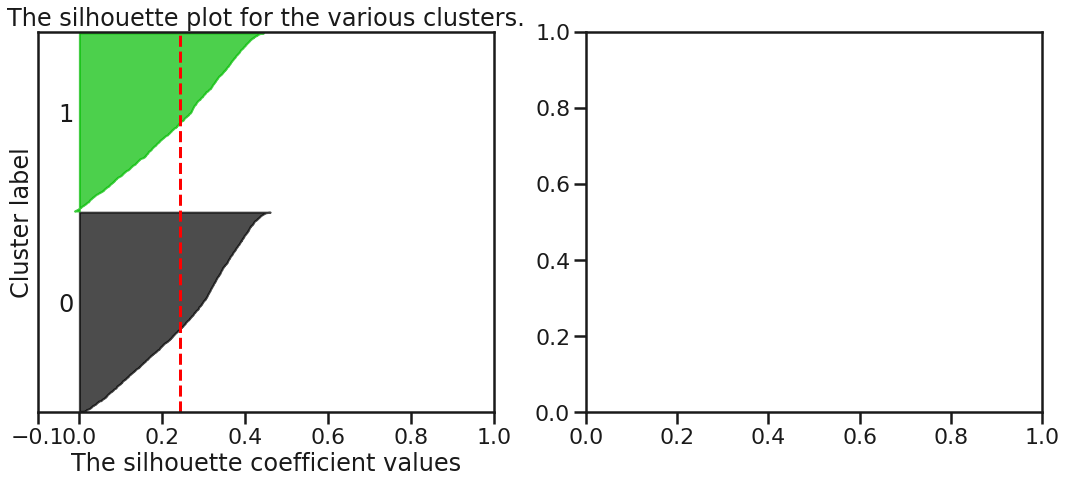

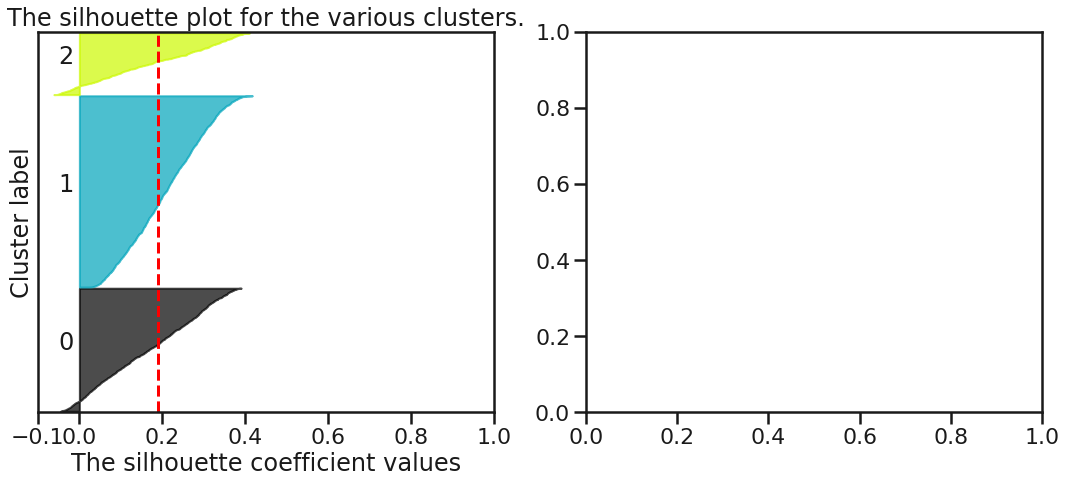

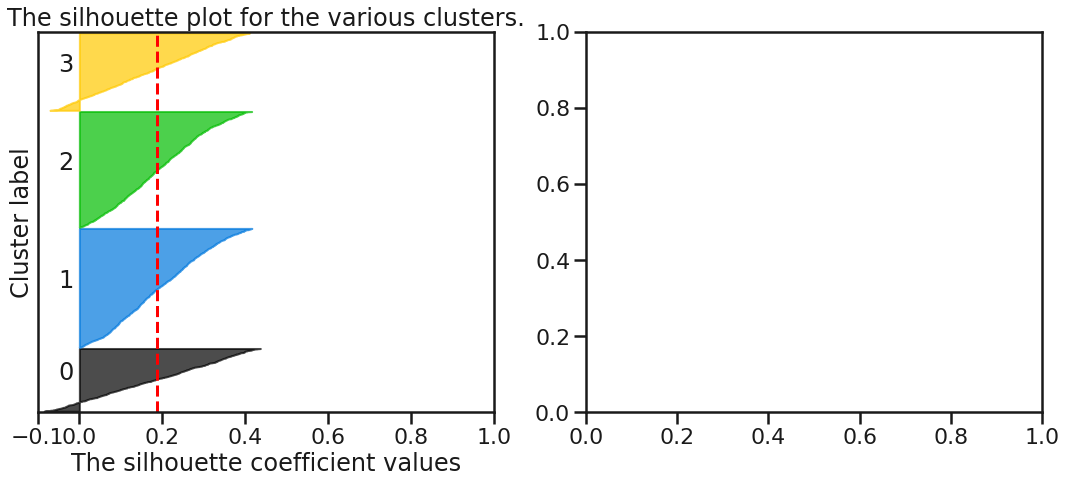

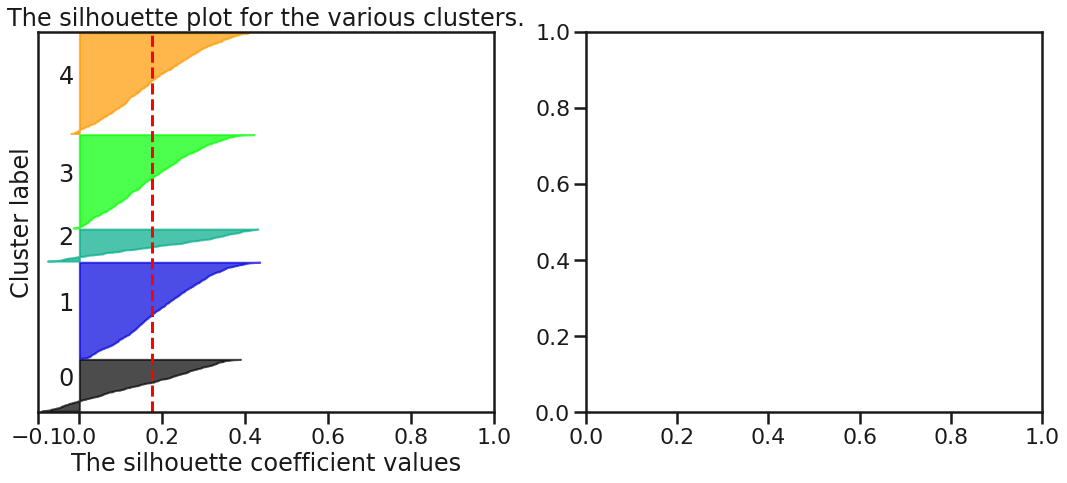

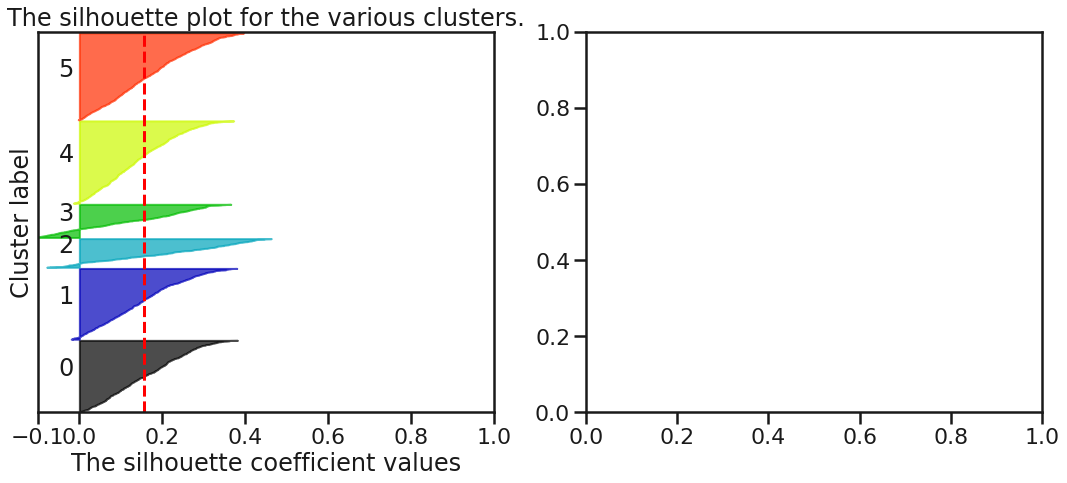

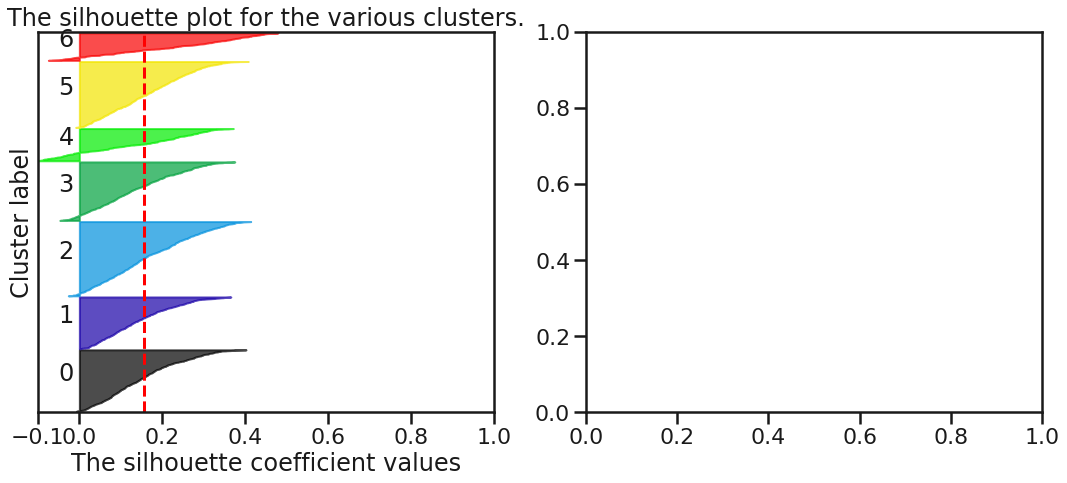

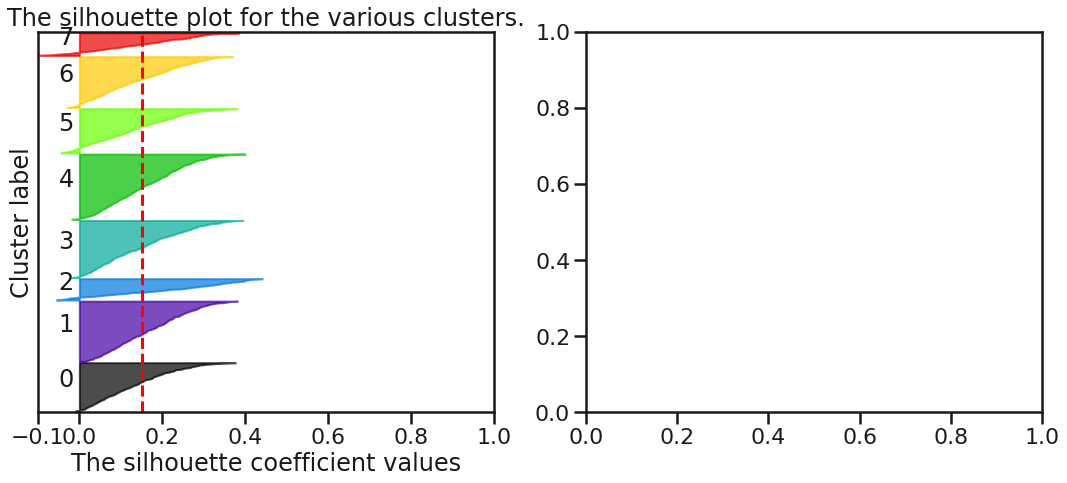

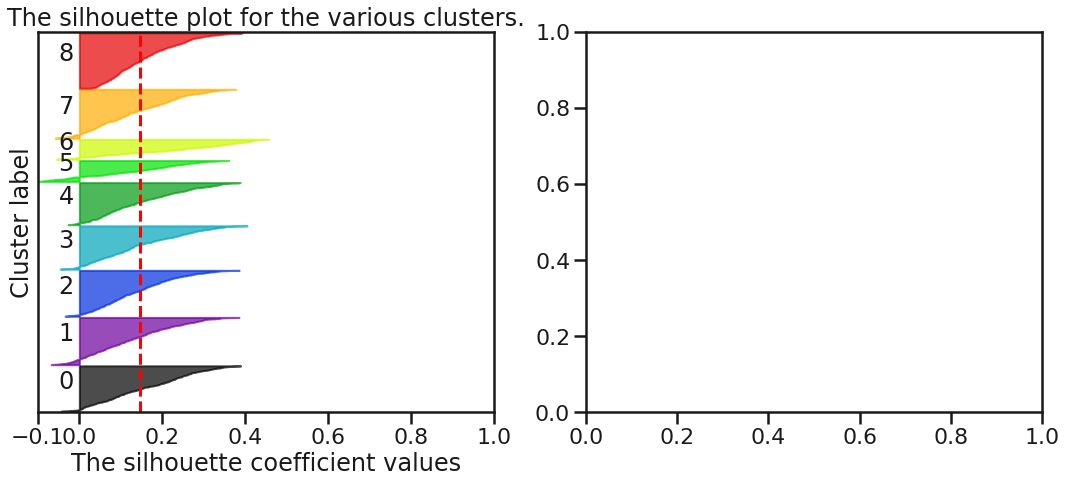

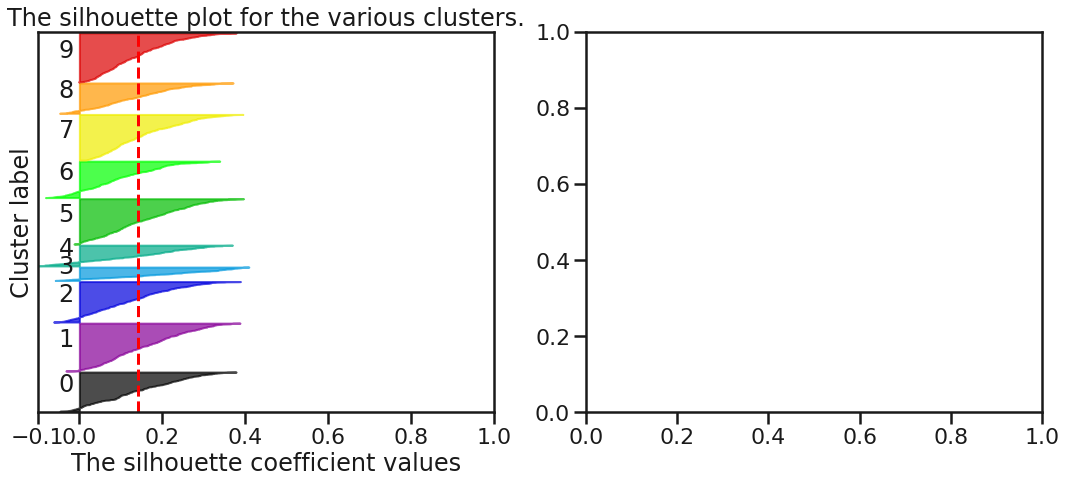

In [24]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7 ,8 ,9 ,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data.values) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data.values)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data.values, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data.values, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
     #           c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
     #           c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
     #               s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
     #             "with n_clusters = %d" % n_clusters),
     #            fontsize=14, fontweight='bold')

plt.show()